In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from jugaad_data.nse import stock_df
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = stock_df(symbol="SBIN", from_date=date(2015,1,1),to_date=date(2020,1,30), series="EQ")

In [3]:
df.head()

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2020-01-30,EQ,316.75,316.75,305.65,316.45,310.00,310.70,311.18,373.8,244.35,35802330,1.114102e+10,227687,SBIN
1,2020-01-29,EQ,317.85,319.70,315.55,315.10,316.95,316.45,317.75,373.8,244.35,23914114,7.598704e+09,143297,SBIN
2,2020-01-28,EQ,317.95,320.00,311.05,316.20,316.40,315.10,316.67,373.8,244.35,26488426,8.388015e+09,173879,SBIN
3,2020-01-27,EQ,320.90,322.00,315.80,324.05,316.40,316.20,318.82,373.8,244.35,23309355,7.431558e+09,148768,SBIN
4,2020-01-24,EQ,323.50,327.30,321.15,323.20,324.30,324.05,325.15,373.8,244.35,22706879,7.383247e+09,146667,SBIN


In [4]:
df.shape

(1251, 15)

In [5]:
data = df[['DATE', 'SYMBOL', 'OPEN', 'PREV. CLOSE', 'LOW', 'HIGH', 'VOLUME']]

In [6]:
data.head()

,DATE,SYMBOL,OPEN,PREV. CLOSE,LOW,HIGH,VOLUME
0,2020-01-30,SBIN,316.75,316.45,305.65,316.75,35802330
1,2020-01-29,SBIN,317.85,315.10,315.55,319.70,23914114
2,2020-01-28,SBIN,317.95,316.20,311.05,320.00,26488426
3,2020-01-27,SBIN,320.90,324.05,315.80,322.00,23309355
4,2020-01-24,SBIN,323.50,323.20,321.15,327.30,22706879


In [7]:
data.shape

(1251, 7)

In [8]:
data['SYMBOL'].value_counts()

SYMBOL
SBIN    1251
Name: count, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         1251 non-null   datetime64[ns]
 1   SYMBOL       1251 non-null   object        
 2   OPEN         1251 non-null   float64       
 3   PREV. CLOSE  1251 non-null   float64       
 4   LOW          1251 non-null   float64       
 5   HIGH         1251 non-null   float64       
 6   VOLUME       1251 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 68.5+ KB


In [10]:
data.describe()

,DATE,OPEN,PREV. CLOSE,LOW,HIGH,VOLUME
count,1251,1251.000000,1251.000000,1251.000000,1251.000000,1.251000e+03
mean,2017-07-15 00:10:21.582733824,272.440568,271.862110,268.413589,275.795004,2.081010e+07
min,2015-01-01 00:00:00,155.000000,151.800000,148.250000,157.650000,2.061681e+06
25%,2016-04-09 12:00:00,252.000000,251.275000,248.525000,255.325000,1.263975e+07
50%,2017-07-14 00:00:00,274.000000,273.300000,269.900000,277.000000,1.701312e+07
75%,2018-10-18 00:00:00,297.000000,297.350000,293.275000,302.000000,2.394051e+07
max,2020-01-30 00:00:00,371.950000,372.400000,366.200000,373.800000,2.626771e+08
std,NaN,40.561452,40.513654,40.123427,40.897982,1.484999e+07


In [11]:
data.isnull().sum()

DATE           0
SYMBOL         0
OPEN           0
PREV. CLOSE    0
LOW            0
HIGH           0
VOLUME         0
dtype: int64

In [12]:
len(data['DATE'].unique())

1251

In [13]:
# def plotter(code):
#     global closing_stock , opening_stock
    
#     #Opening Price Plot
    
#     plt.subplot(2,1,1)
#     company = df[df['SYMBOL'] == code]
#     company = company['OPEN'].values.astype('float32')
#     company = company.reshape(-1,1)
#     opening_stock = company
    
#     plt.grid(True)
#     plt.xlabel('Time')
#     plt.ylabel(code + '  Open stock prices')
#     plt.title('Price X Time' + code)
#     plt.plot(company,'g')
#     plt.show()
    
#     #Closing Price Plot
#     plt.subplot(2,1,2)
#     company_close = df[df['SYMBOL'] == code]
#     company_close = company_close['CLOSE'].values.astype('float32')
#     company_close = company_close.reshape(-1,1)
#     closing_stock = company_close
    
#     plt.grid(True)
#     plt.xlabel('Time')
#     plt.ylabel(code + '  Close Stock Prices')
#     plt.title('Price X Time for  '+ code)
#     plt.plot(company_close,'b')
#     plt.show()
    

In [47]:
# plotter('SBIN')

In [15]:
stocks = np.array(data[data['SYMBOL'].isin(['SBIN'])]['PREV. CLOSE'])

stocks

array([316.45, 315.1 , 316.2 , ..., 315.25, 314.  , 311.85])

In [16]:
stocks = stocks.reshape(-1,1)
stocks.shape

(1251, 1)

In [17]:
mms = MinMaxScaler(feature_range=(0,1))
stocks = mms.fit_transform(stocks)
stocks

array([[0.74637353],
       [0.74025385],
       [0.74524025],
       ...,
       [0.74093382],
       [0.73526745],
       [0.72552131]])

In [18]:
train_len = int(len(stocks) * 0.8)
train_len

1000

In [19]:
test_len = len(stocks) - train_len
test_len

251

In [20]:
train = stocks[0:train_len]
print(train.shape)

(1000, 1)


In [21]:
test = stocks[train_len:]
print(test.shape)

(251, 1)


In [22]:
def process_data(data , n_features):
    dataX , dataY = [],[]
    for i in range(len(data) - n_features):
        a = data[i : (i + n_features),0]
        dataX.append(a)
        dataY.append(data[i + n_features,0 ])
    return np.array(dataX) , np.array(dataY)

In [23]:
n_features = 5
trainX , trainY = process_data(train , n_features)
print(trainX.shape , trainY.shape)

(995, 5) (995,)


In [24]:
testX , testY = process_data(test , n_features)
print(testX.shape , testY.shape)

(246, 5) (246,)


In [25]:
stocksX, stocksY = process_data(stocks, n_features)
print (stocksX.shape , stocksY.shape)

(1246, 5) (1246,)


In [26]:
trainX[:10]

array([[0.74637353, 0.74025385, 0.74524025, 0.78082502, 0.77697189],
       [0.74025385, 0.74524025, 0.78082502, 0.77697189, 0.7450136 ],
       [0.74524025, 0.78082502, 0.77697189, 0.7450136 , 0.73390752],
       [0.78082502, 0.77697189, 0.7450136 , 0.73390752, 0.73526745],
       [0.77697189, 0.7450136 , 0.73390752, 0.73526745, 0.75339982],
       [0.7450136 , 0.73390752, 0.73526745, 0.75339982, 0.7774252 ],
       [0.73390752, 0.73526745, 0.75339982, 0.7774252 , 0.78173164],
       [0.73526745, 0.75339982, 0.7774252 , 0.78173164, 0.79873073],
       [0.75339982, 0.7774252 , 0.78173164, 0.79873073, 0.81119674],
       [0.7774252 , 0.78173164, 0.79873073, 0.81119674, 0.81799637]])

In [27]:
print(trainX.shape)
trainX = trainX.reshape(trainX.shape[0] , 1 , trainX.shape[1])
trainX.shape

(995, 5)


(995, 1, 5)

In [28]:
testX = testX.reshape(testX.shape[0] , 1 , testX.shape[1])
testX.shape

(246, 1, 5)

In [29]:
stocksX= stocksX.reshape(stocksX.shape[0] , 1 ,stocksX.shape[1])
display (stocksX.shape)

(1246, 1, 5)

# BUILDING MODEL

In [30]:
from keras.layers import LSTM , GRU
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization , Dropout , Activation
from keras.optimizers import Adam , SGD , RMSprop
from sklearn.metrics import mean_squared_error
import math

In [31]:
filepath = 'PRJ Stock Price Prediction\stock_weights1.hdf5'
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor = 'val_loss' , factor = 0.1 , epsilon = 0.0001 , patience = 1 , verbose = 1)
checkpoint = ModelCheckpoint(filepath , monitor = 'val_loss' , varbose = 1 , save_best_only = True , mode = 'max')

In [32]:
model = Sequential()

In [33]:
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 256)            201984    
                                                                 
 dropout (Dropout)           (None, 1, 256)            0         
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 743,809
Trainable params: 743,809
Non-trai

In [34]:
model.compile( loss = 'mean_squared_error' , optimizer = Adam(learning_rate=0.0005) , metrics = ['mean_squared_error'])

In [35]:
history = model.fit(trainX , trainY , epochs = 50 , callbacks = [checkpoint , lr_reduce] , validation_data = (testX , testY))

Epoch 1/50
32/32 [==============================] - 6s 58ms/step - loss: 0.0888 - mean_squared_error: 0.0888 - val_loss: 0.0036 - val_mean_squared_error: 0.0036 - lr: 5.0000e-04
Epoch 2/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - lr: 5.0000e-04
Epoch 3/50
28/32 [=========================>....] - ETA: 0s - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
32/32 [==============================] - 0s 15ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0017 - val_mean_squared_error: 0.0017 - lr: 5.0000e-04
Epoch 4/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - lr: 5.0000e-05
Epoch 5/50
31/32 [============================>.] - ETA: 0s - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 5: Reduc

In [36]:
test_pred = model.predict(testX)
test_pred[:10]

8/8 [==============================] - 1s 8ms/step


array([[0.3462556 ],
       [0.35292917],
       [0.36058986],
       [0.36831364],
       [0.36802915],
       [0.37196484],
       [0.37419468],
       [0.37611252],
       [0.37399736],
       [0.37638757]], dtype=float32)

In [37]:
test_pred = mms.inverse_transform(test_pred)
test_pred[:10]

array([[228.18398],
       [229.65617],
       [231.34613],
       [233.04997],
       [232.98723],
       [233.85545],
       [234.34735],
       [234.77042],
       [234.30382],
       [234.83109]], dtype=float32)

In [38]:
testY[:10]

array([0.33544878, 0.3463282 , 0.34950136, 0.3467815 , 0.35290118,
       0.34700816, 0.35652765, 0.33862194, 0.35856754, 0.34224841])

In [39]:
testY = testY.reshape(testY.shape[0] , 1)
testY[:10]

array([[0.33544878],
       [0.3463282 ],
       [0.34950136],
       [0.3467815 ],
       [0.35290118],
       [0.34700816],
       [0.35652765],
       [0.33862194],
       [0.35856754],
       [0.34224841]])

In [40]:
testY = mms.inverse_transform(testY)
testY[:10]

array([[225.8 ],
       [228.2 ],
       [228.9 ],
       [228.3 ],
       [229.65],
       [228.35],
       [230.45],
       [226.5 ],
       [230.9 ],
       [227.3 ]])

In [46]:
from sklearn.metrics import r2_score
score = r2_score(testY , test_pred)
score

0.8849616789532138

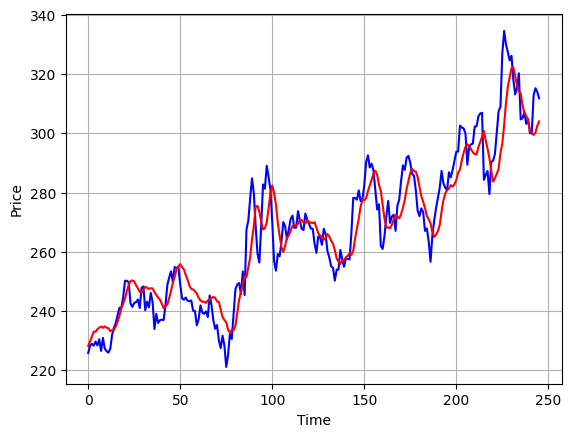

In [42]:
plt.plot(testY , 'b')
plt.plot(test_pred , 'r')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()